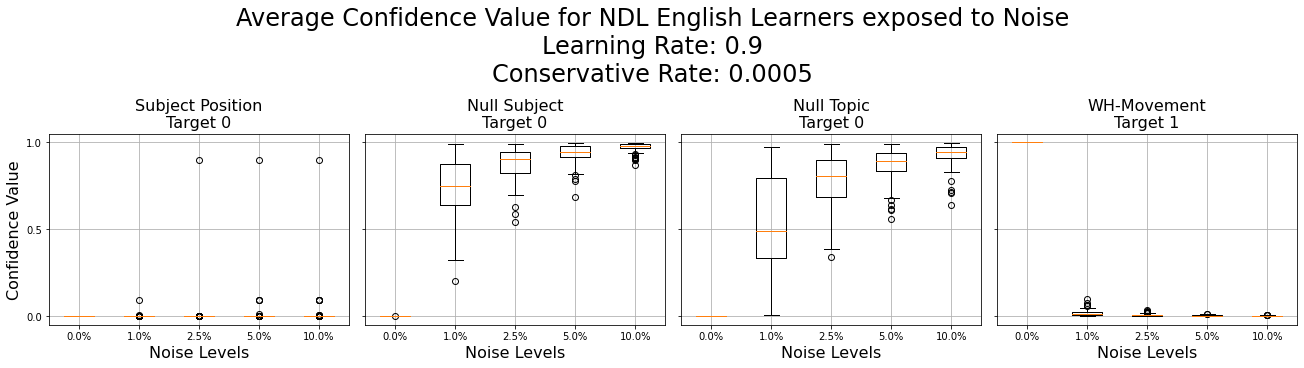

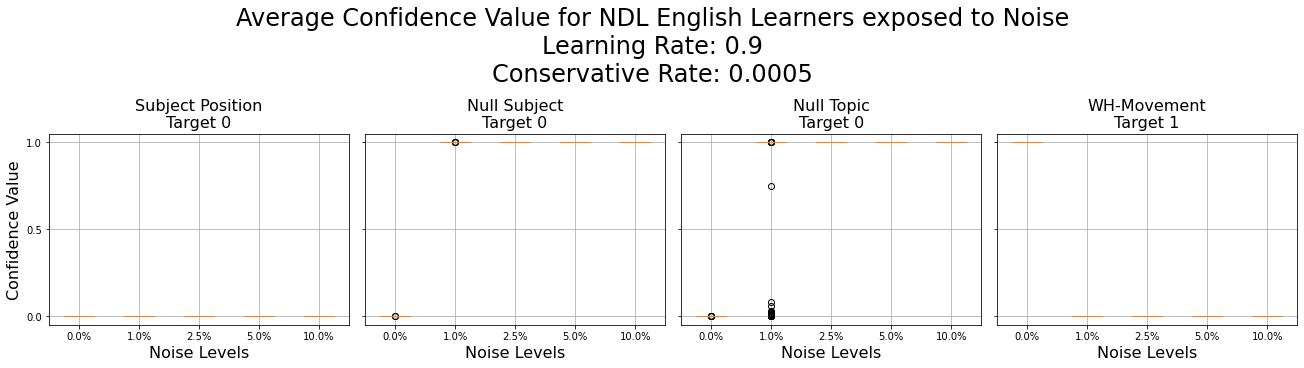

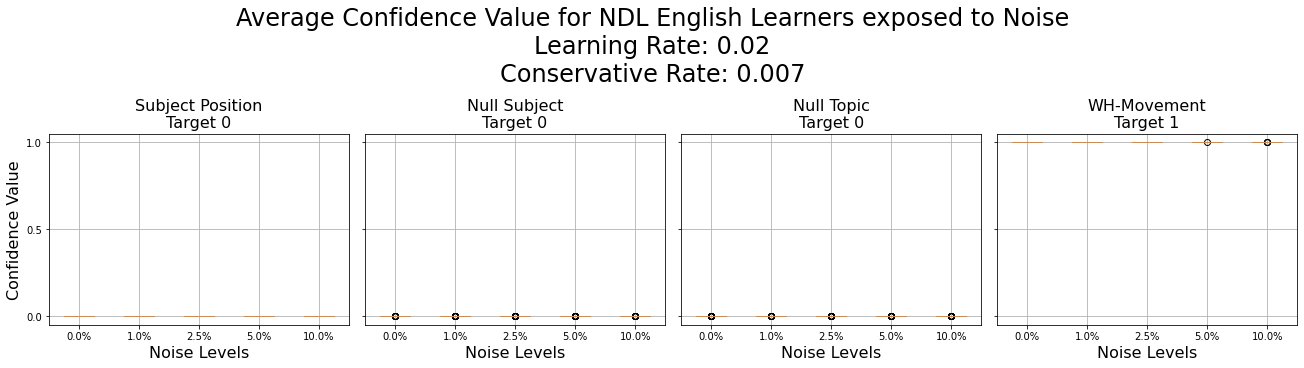

In [2]:
from collections import namedtuple
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = 18, 5

Parameter = namedtuple('Parameter', 'number symbol name')
Language = namedtuple('Language', 'number name')

params = [
    Parameter(0, 'SP', 'Subject Position'),
    Parameter(4, 'NS', 'Null Subject'),
    Parameter(5, 'NT', 'Null Topic'),
    Parameter(6, 'WHM', 'WH-Movement')
]

languages = {
    'en': Language(611, 'English'),
    'fr': Language(584, 'French'),
    'de': Language(2253, 'German'),
    'jp': Language(3856, 'Japanese')
}

def get_learning_rates(pathname):
    return re.search(r'R(?P<rate>0.\d+)_C(?P<consrate>0.\d+)',
                                pathname).groupdict()

def get_target_val(language: Language, param: Parameter):
    grammar_str = format(language.number, '013b')
    return grammar_str[param.number]

def plot_language(lang: Language, pathname, outpath=None):
    df = pd.read_csv(pathname)
    rates = get_learning_rates(pathname)
    fig, axs = plt.subplots(1, len(params), constrained_layout=True, sharey=True)
    
    title = [
        f'Average Confidence Value for NDL {lang.name} Learners exposed to Noise',
        f'Learning Rate: {rates["rate"]}',
        f'Conservative Rate: {rates["consrate"]}'
    ]
    title = '\n'.join(title)
    fig.suptitle(title, fontsize=24)

    noise_amounts = df.noise.unique()
    noise_amounts.sort()

    for index, (ax, param) in enumerate(zip(axs, params)):
        ax.set_yticks([0, 0.5, 1])
        ax.set_title(f'{param.name}\nTarget {get_target_val(lang, param)}', fontsize=16)
        if index == 0:
            ax.set_ylabel('Confidence Value', fontsize=16)
        ax.set_xlabel('Noise Levels', fontsize=16)
        ax.boxplot(
            np.array([df[df.language.eq(lang.number) & df.noise.eq(ns)][param.symbol].values for ns in noise_amounts]).T);
        ax.set_xticklabels([f'{n*100}%' for n in noise_amounts])
        ax.grid()
    if outpath:
        fig.savefig(outpath)
        
en = languages['en']
plot_language(en, 
              '../simulation_output/2021-03-03:14:48:38_R0.9_C0.0005/output.csv',
             'fig-1_old-rates-old-lrp.png')
plot_language(en, 
              '../simulation_output/2021-03-03:14:55:58_R0.9_C0.0005_mod-lrp/output.csv',
             'fig-3_old-rates-new-lrp.png')
plot_language(en, 
              '../simulation_output/2021-03-18:13:26:12_R0.02_C0.007_mod-lrp/output.csv',
             'fig-4_new-rates-new-lrp')

In [12]:
import pickle
path = '/home/paul/repos/work/colag/NDLNoise/simulation_output/2021-03-22:22:39:30_R0.9_C0.0005/plots/611-0.pkl'
with open(path, 'rb') as fh:
    history = pickle.load(fh)
    zero = pd.DataFrame(history)['SP'].values

In [4]:
import pickle
path = '/home/paul/repos/work/colag/NDLNoise/simulation_output/2021-03-22:22:39:30_R0.9_C0.0005/plots/611-0.05.pkl'
with open(path, 'rb') as fh:
    history = pickle.load(fh)
    five = pd.DataFrame(history)['SP'].values

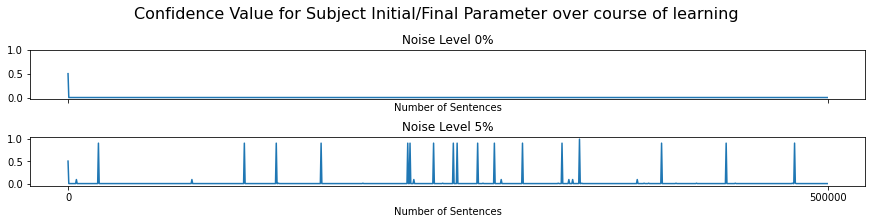

In [45]:
plt.rcParams['figure.figsize'] = 12, 3

fig, axs = plt.subplots(2, 1, sharex=True, constrained_layout=True)
axs[0].plot(zero, label='ok')
axs[1].plot(five)
axs[1].set_xticks([0, 1000])
axs[1].set_xticklabels([0, 500000])
axs[1].set_yticks([0, 0.5, 1])
axs[0].set_yticks([0, 0.5, 1])

fig.suptitle('Confidence Value for Subject Initial/Final Parameter over course of learning', fontsize=16)
axs[0].set_xlabel('Number of Sentences')
axs[1].set_xlabel('Number of Sentences')
axs[0].set_title('Noise Level 0%')
axs[1].set_title('Noise Level 5%')
fig.savefig('fig-2_run-plots.png')